![](https://api.brandy.run/core/core-logo-wide)

# Supervised Learning: Classification Metrics

Bastante buen accuracy, no? Más de un 95% correcto!

Pero investiguemos un poco más que significa esa metrica, el `accuracy`.

In [10]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np

X,y = fetch_openml("mnist_784", return_X_y=True)
sevens = y == "7"
X_train, X_test, y_train, y_test = train_test_split(X,sevens, test_size=0.2)

In [11]:
# Creamos nuestro proprio modelo que siempre dice falso
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_score


class AlwaysFalse(BaseEstimator):
    def fit(self, X, y):
        return self
    def predict(self, X):
        return np.zeros(X.shape[0])

In [3]:
model_always_false = AlwaysFalse()

In [4]:
np.zeros(4)

array([0., 0., 0., 0.])

In [5]:
X_test.shape

(14000, 784)

In [6]:
X.shape

(70000, 784)

In [7]:
y[:10]

0    5
1    0
2    4
3    1
4    9
5    2
6    1
7    3
8    1
9    4
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [8]:
model_always_false.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [9]:
cross_val_score(AlwaysFalse(), X, sevens, scoring="accuracy", cv=5)

array([0.89407143, 0.89842857, 0.89821429, 0.89428571, 0.89407143])

> "Hasta un reloj parado acierta 2 veces al día."

Como podemos ver, el accuracy no siempre describe lo bueno que es nuestro modelo. Incluso el modelo que siempre dice False tiene un 90% de accuracy, puesto que solo un ~10% de los datos son el numero 7.

<img src="img/accuracy_precision.png"/>

> Me suena eso...

## Confusion Matrix

Una matriz de confusión es una manera de relacionar las previsiones con los labels para problemas de clasificación. Un modelo que acierta todas las previsiones solo tendría valores en su diagonal.

In [24]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix

In [25]:
model = SGDClassifier()
model.fit(X_train, y_train)

SGDClassifier()

In [14]:
y_pred = model.predict(X_test)

In [15]:
# confusion_matrix(Ground_Truth,Predictions)
conf = confusion_matrix(y_test, y_pred)
conf

array([[15473,   197],
       [  151,  1679]])

In [16]:
import pandas as pd
cols = ["Not_7_pred", "7_pred"]
ids = ["Not_7", "7"]
pd.DataFrame(conf, columns=cols, index=ids)

,Not_7_pred,7_pred
Not_7,15473,197
7,151,1679


In [87]:
# Accuracy : Los TRUE (TP+TN) / todos los valores
(15517+1649)/(15517+1649+105+229)

0.9809142857142857

In [98]:
# Precision: Los TP / P (Los acertos positivos sobre todos los positivos)
1649/(1649+105)

0.9401368301026226

## TP, FP, TN, FN

Utilizando la matriz de confusión, podemos ver como nuestro modelo se comporta en relación a la realidad y podemos categorizar cada predición como una de las siguientes cuatro posibilidades:

- True Positive
- True Negative
- False Positive
- False Negative

## True Results <a class="tocSkip"/>

### True Positive: Predicted 7, was a 7.

In [90]:
TP = np.logical_and(y_test, y_pred)

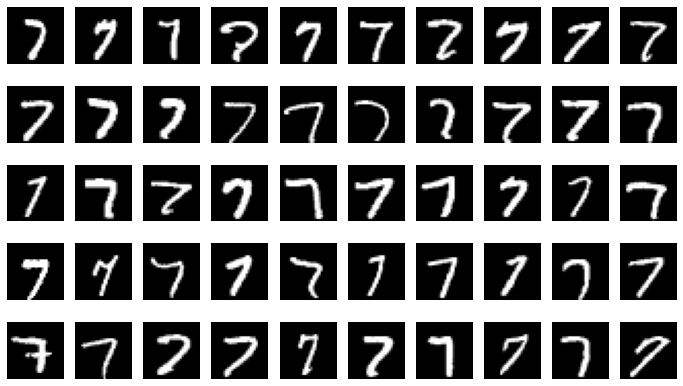

In [91]:
plt.figure(figsize=(12,7))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.axis("off")
    plt.imshow(X_test[TP].iloc[i].values.reshape(28,28), cmap="gray")

### True Negative: Predicted Not_7, was NOT a 7.


In [92]:
TN = np.logical_and(~y_test, ~y_pred)

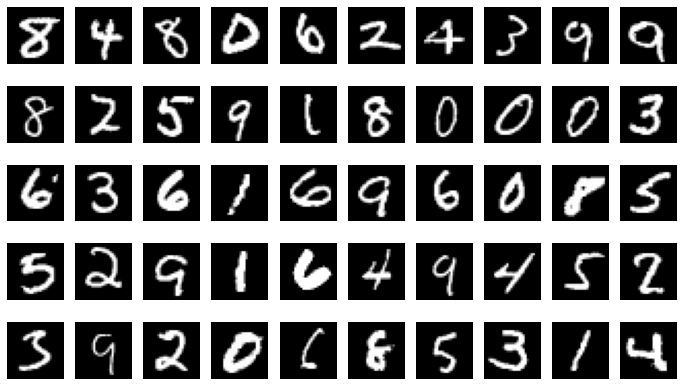

In [93]:
plt.figure(figsize=(12,7))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.axis("off")
    plt.imshow(X_test[TN].iloc[i].values.reshape(28,28), cmap="gray")

## False Results <a class="tocSkip"/>

### False Positive: Predicted 7, was NOT a 7.

In [94]:
FP = np.logical_and(~y_test, y_pred)

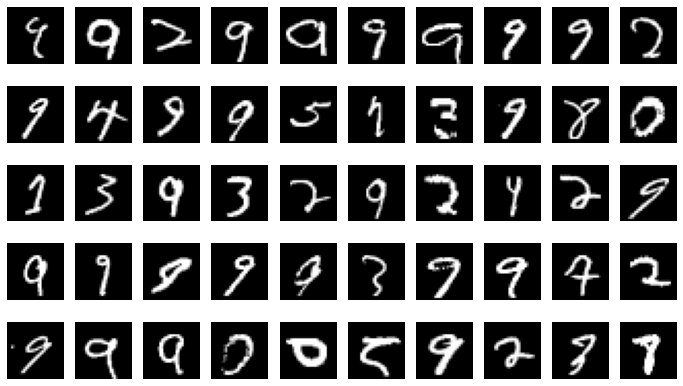

In [95]:
plt.figure(figsize=(12,7))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.axis("off")
    plt.imshow(X_test[FP].iloc[i].values.reshape(28,28), cmap="gray")

### False Negative: Predicted Not_7, was a 7.

In [96]:
FN = np.logical_and(y_test, ~y_pred)

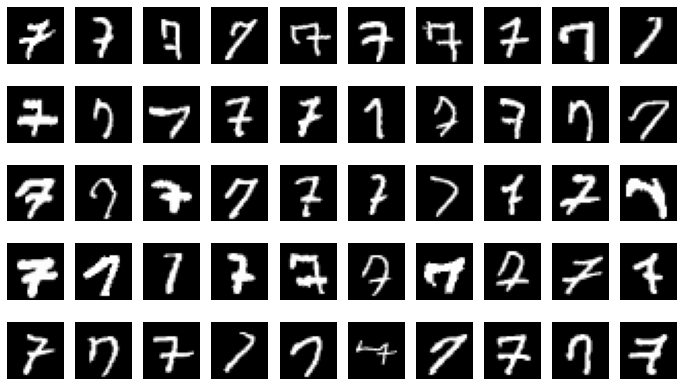

In [97]:
plt.figure(figsize=(12,7))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.axis("off")
    plt.imshow(X_test[FN].iloc[i].values.reshape(28,28), cmap="gray")

### Never forget <a class="tocSkip"/>

<img src="img/true_p_meme.png"/>

## Accuracy, Precision and Recall

Las métricas `accuracy, precision, recall` se calculan en función de las cantidades de True Positives, True Negatives, False Positive y False Negative.

### Accuracy

El `accuracy`, como lo hemos calculado antes, se calcula por la suma de los True sobre todas las predicciones.

$$
Accuracy = \frac{TP+TN}{TP+TN+FP+FN}
$$

En nuestro ejemplo, el accuracy no nos dá toda la información pues hay un desbalance muy grande entre las clases (90% no 7, 10% 7). Miremos otras dos métricas para clasificación:

<img src="img/precision_recall.png" width=500/>

### Precision

Si miramos apenas el accuracy de los positivos, estaremos mirando la métrica llamada precision. 

$$
Precision = \frac{TP}{TP+FP}
$$

Como podemos ver por la manera como se calcula, tendriamos un precision perfecto (1) si todas las predicciones positivas fueran correctas, incluso si se hiciera apenas una única predicción. Por eso, el precision suele estar acompañado de otra métrica:

### Recall

También llamado de sensibilidad o `True Positive Rate`, el recall mide la proporción de todos los positivos bien predichos dentre todos los positivos.

$$
Recall = \frac{TP}{TP+FN}
$$

In [99]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [101]:
accuracy_score(y_test,y_pred)

0.9809142857142857

In [102]:
precision_score(y_test,y_pred)

0.9401368301026226

In [103]:
recall_score(y_test,y_pred)

0.8780617678381256

### Interpreting the metrics

#### Accuracy:
En 98% de las veces, el modelo acierta la predicción

#### Precision:
De todos las veces que dijo 7, solo 94% eran 7

#### Recall:
El modelo solo detecta 87.8% de todos los 7

### $F_1$-score

Como vamos utilizar las métricas para comparar diferentes modelos, es interesante que posamos combinar precision y recall en una única metrica, el $F_1$, la média armónica entre ambos.

$$
F_1 = 2 \times \frac{precision\times recall}{precision + recall}
$$

El $F_1$ favorece a los modelos que tengan valores parecidos para recall y precision. Eso no siempre es lo que queremos o necesitamos. Hay una relación equilibrada entre recall y precision.

In [104]:
from sklearn.metrics import f1_score

In [106]:
f1_score(y_test,y_pred)

0.9080396475770925

## Precision Recall Curve

In [26]:
samples = X_test.iloc[[10,40,46,90]]
print(samples.shape)
model.predict(samples)

(4, 784)


array([False, False, False, False])

In [29]:
X_test.iloc[90]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 35798, Length: 784, dtype: float64

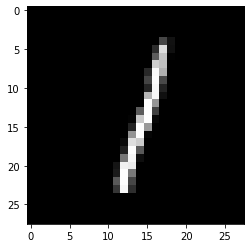

In [33]:
import matplotlib.pyplot as plt
plt.imshow(X_test.iloc[90].values.reshape(28,28), cmap="gray")

In [27]:
model.decision_function(samples)

array([-2548.70041147, -5788.55827467, -7037.18167681,   -57.80837412])

In [19]:
threshold = 5000
model.decision_function(X_test.loc[[34506]]) > threshold

array([ True])

In [127]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

In [128]:
y_scores = cross_val_predict(model, X, sevens, method="decision_function")

In [129]:
y_scores[:5]

array([-19386.52345285, -23862.29914898,  -6766.9196377 , -12153.11104153,
        -7837.82360934])

In [130]:
precision, recall, threshold = precision_recall_curve(sevens, y_scores)

In [131]:
precision.shape

(68192,)

In [132]:
f1 = (2*recall[:-1]*precision[:-1])/(precision[:-1]+recall[:-1])

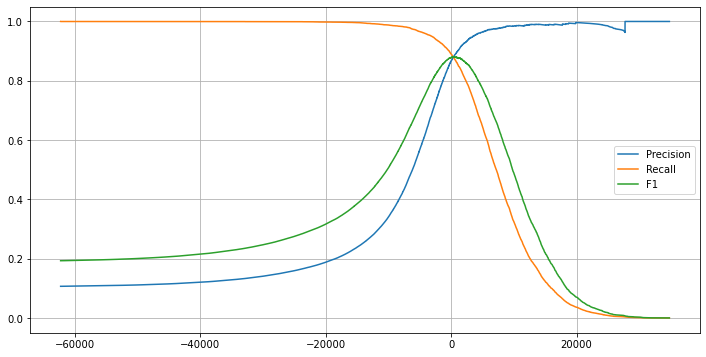

In [133]:
plt.figure(figsize=(12,6))
plt.plot(threshold,precision[:-1], label="Precision")
plt.plot(threshold,recall[:-1], label="Recall")
plt.plot(threshold, f1, label="F1")
plt.grid()
plt.legend()

## Receiver Operating Characteristic ( ROC curve )

http://arogozhnikov.github.io/2015/10/05/roc-curve.html


In [134]:
from sklearn.metrics import roc_curve

In [135]:
fpr, tpr, threshold = roc_curve(sevens, y_scores)

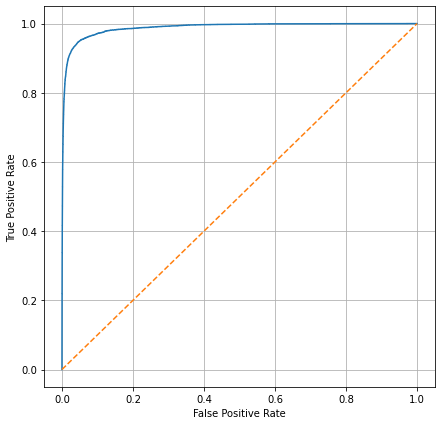

In [136]:
plt.figure(figsize=(7,7))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()

- AUC : Area Under Curve

In [137]:
from sklearn.metrics import roc_auc_score

In [138]:
roc_auc_score(sevens, y_scores)

0.9877982446557678